### Understanding the AUC

The AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example:

$$ P\Big(\text{score}(x^+) > \text{score}(x^-)\Big) $$

In [1]:
# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import make_moons
from sklearn.metrics import auc, balanced_accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve
from sklearn.svm import SVC

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate Synthetic Data Set
vYRoc = np.array(['P', 'P', 'N', 'P', 'P' , 'P' , 'N' , 'N' , 'P' , 'N' , 'P' , 'N' , 'P' , 'N' , 'N' , 'N' , 'P' , 'N' , 'P' , 'N'])
vSRoc = np.array([0.9, 0.8, 0.9, 0.6, 0.55, 0.51, 0.49, 0.43, 0.22, 0.39, 0.13, 0.31, 0.23, 0.22, 0.19, 0.15, 0.12, 0.11, 0.04, 0.01]) #<! Score values (Probability for Class 1)

vYRoc = np.where(vYRoc == 'P', 1, 0) #<! Labels


In [3]:
# Calculate ROC & AUC
vFPRoc, vTPRoc, vThrRoc = roc_curve(vYRoc, vSRoc, pos_label = 1)
aucRoc                  = auc(vFPRoc, vTPRoc)
print(f'AUC = {aucRoc}')

AUC = 0.6


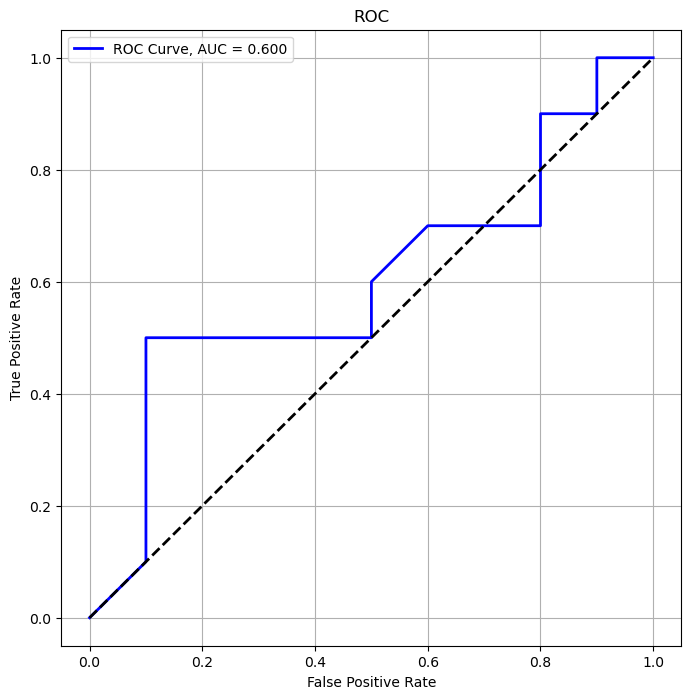

In [4]:
# Plot the ROC
hF, hA = plt.subplots(figsize = (8, 8))

hA.plot(vFPRoc, vTPRoc, color = 'b', lw = 2, label = f'ROC Curve, AUC = {aucRoc:.3f}')
hA.plot([0, 1], [0, 1], color = 'k', lw = 2, linestyle = '--')
hA.set_xlabel('False Positive Rate')
hA.set_ylabel('True Positive Rate')
hA.set_title('ROC')
hA.grid()
hA.legend()

plt.show()


In [5]:
# Empirical AUC
vIdx0Roc = vYRoc == 0
vIdx1Roc = vYRoc == 1

# Empirical AUC: Count the number of higher score for positive label.
empAuc = np.mean(np.random.choice(vSRoc[vIdx1Roc], 1000) > np.random.choice(vSRoc[vIdx0Roc], 1000))
print(f'Empirical AUC: {empAuc}')

Empirical AUC: 0.59


In [6]:
# Estimation of Label by Score
vYEstRoc = vSRoc > 0.5
vYEstRoc = vYEstRoc.astype(np.int32)

In [7]:
# Balanced Accuracy
# The balanced accuracy is the Mean of TPR (Recall / Sensitivity) and TNR (Specificity).
# It is equivalent to the accuracy weighted by the class frequency.
precisionRoc, recallRoc, f1Roc, _   = precision_recall_fscore_support(vYRoc, vYEstRoc, pos_label = 1, average = 'binary')
tnRoc, fpRoc, fnRoc, tpRoc          = confusion_matrix(vYRoc, vYEstRoc).ravel() #<! Another way to access all measures
specificityRoc = tnRoc / (tnRoc + fpRoc)
0.5 * (recallRoc + specificityRoc)

0.7

In [8]:
# AUC vs. Accuracy
# The AUC and Accuracy are not equivalent!
empAccu = np.mean(vYEstRoc == vYRoc)
print(f'Empirical Accuracy: {empAccu}')

Empirical Accuracy: 0.7
